# Algoritmo K-means (clusterização)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import sklearn as skl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cometa_csv/delicious.csv')

In [3]:
m_delicious = df.loc[:, "TAG_.imported":"TAG_youtube"]

In [4]:
mt_delicious = np.array(m_delicious).T
display(mt_delicious)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Analisando dados (maior/menor)

#### Verificando quem é o menor valor diferente de zero
A máscara booleana é criada usando o operador != para comparar cada elemento do ndarray com zero. O resultado é um array booleano com valores True para os elementos diferentes de zero e False para os elementos iguais a zero.

In [7]:
mask = m_euclidiana!= 0
min_value = np.min(m_euclidiana[mask])
print(min_value)

1.7320508075688772


In [8]:
mask = m_euclidiana!= 1
max_value = np.max(m_euclidiana[mask])
print(max_value)

88.12491134747314


In [9]:
mask = m_jaccard != 0
min_value = np.min(m_jaccard[mask])
print(min_value)

0.03571428571428571


In [10]:
mask = m_jaccard != 1
max_value = np.max(m_jaccard[mask])
print(max_value)

0.9998528329654157


In [11]:
median = (max_value-min_value)/2
median

0.482069273625565

## Kmeans usando distância Euclidiana

In [6]:
m_euclidiana = skl.metrics.pairwise_distances(mt_delicious, metric='euclidean')
m_euclidiana

array([[ 0.        , 19.20937271, 16.34013464, ..., 15.5241747 ,
        12.92284798, 19.        ],
       [19.20937271,  0.        , 21.3541565 , ..., 22.        ,
        20.49390153, 24.77902339],
       [16.34013464, 21.3541565 ,  0.        , ..., 19.79898987,
        17.72004515, 22.4053565 ],
       ...,
       [15.5241747 , 22.        , 19.79898987, ...,  0.        ,
        17.08800749, 22.04540769],
       [12.92284798, 20.49390153, 17.72004515, ..., 17.08800749,
         0.        , 20.19900988],
       [19.        , 24.77902339, 22.4053565 , ..., 22.04540769,
        20.19900988,  0.        ]])

#### Recorrendo ao Kmeans ++ para otimizar a escolha do centroide

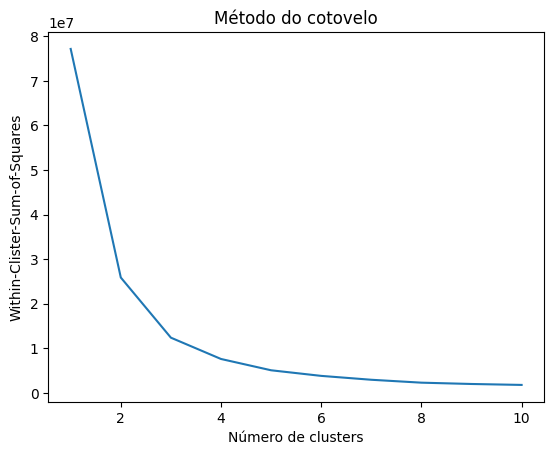

In [12]:
# metodo cotovelo 
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 50)
    kmeans.fit(m_euclidiana)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Within-Clister-Sum-of-Squares')
plt.show()

#### Silhueta 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [78]:
# Silhueta
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(m_euclidiana)
    score = silhouette_score(m_euclidiana, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.7862539116877995
Silhueta para 3 clusters : 0.7008229490588023
Silhueta para 4 clusters : 0.6742336223320573
Silhueta para 5 clusters : 0.5901663598845552
Silhueta para 6 clusters : 0.5660229715882507
Silhueta para 7 clusters : 0.5620042503323059
Silhueta para 8 clusters : 0.5279446373246246
Silhueta para 9 clusters : 0.4855183519215989
Silhueta para 10 clusters : 0.4338160918320925


#### Supondo k=2

In [79]:
kmeans = KMeans(n_clusters = 2, init='k-means++', max_iter=300, n_init=30)
clusters = kmeans.fit_predict(m_euclidiana)
clusters  # consigo ver quem pertence a quais conjuntos

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

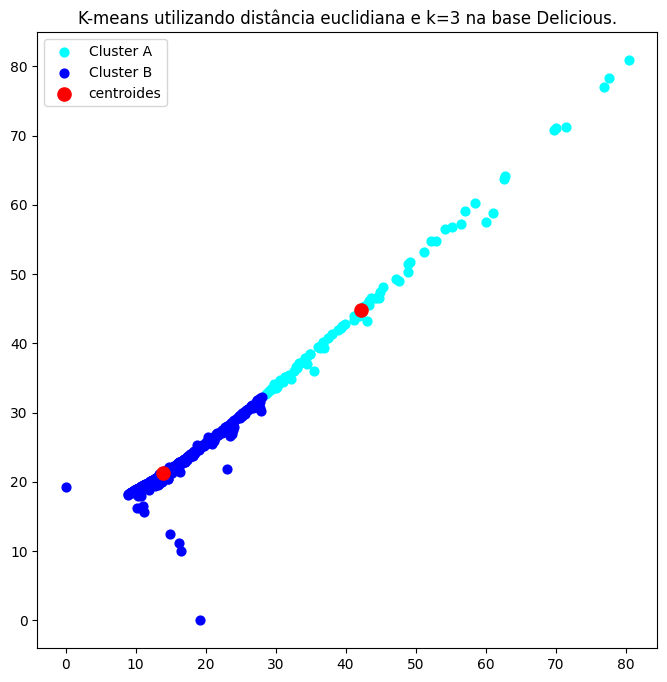

In [81]:
x = m_euclidiana

plt.figure(figsize=(8, 8))
plt.scatter(
    x[clusters == 0,0], x[clusters == 0,1],
    s=40,c='cyan',
    #edgecolor='black',
    label='Cluster A'
)

plt.scatter(
    x[clusters == 1,0], x[clusters == 1,1],
    s=40,c='blue',
    #edgecolor='black',
    label='Cluster B'
)

# centroide
plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
    s=90,c='red',
    #edgecolor='black',
    label='centroides'
)

plt.title('K-means utilizando distância euclidiana e k=3 na base Delicious.')
plt.legend()
plt.show()

#### Supondo k=3

In [71]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=30)
clusters = kmeans.fit_predict(m_euclidiana)
clusters  # consigo ver quem pertence a quais conjuntos

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,

#### Duvidas
- Devo normalizar os dados? A justificativo seria para que a variação em um atributo não ofusque as variações em outros atributos.


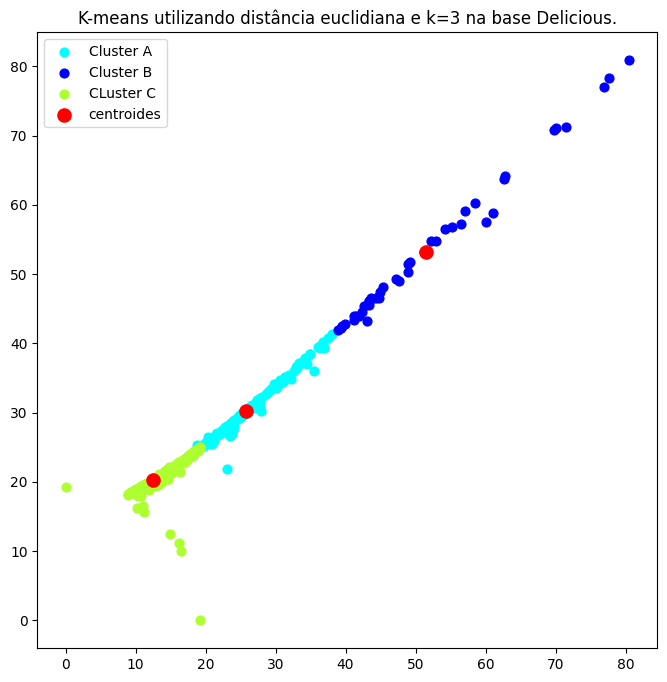

In [72]:
x = m_euclidiana

plt.figure(figsize=(8, 8))
plt.scatter(
    x[clusters == 0,0], x[clusters == 0,1],
    s=40,c='cyan',
    #edgecolor='black',
    label='Cluster A'
)

plt.scatter(
    x[clusters == 1,0], x[clusters == 1,1],
    s=40,c='blue',
    #edgecolor='black',
    label='Cluster B'
)
plt.scatter(
    x[clusters == 2,0], x[clusters == 2,1],
    s=40,c='greenyellow',
    #edgecolor='black',
    label='CLuster C'
)

# centroide
plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
    s=90,c='red',
    #edgecolor='black',
    label='centroides'
)

plt.title('K-means utilizando distância euclidiana e k=3 na base Delicious.')
plt.legend()
plt.show()

## Implementando para outras distâncias 


### Jaccard

In [29]:
m_jaccard = skl.metrics.pairwise_distances(mt_delicious, metric='jaccard')
m_jaccard

/home/julianapirolla/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 0.93442623, ..., 0.98977505, 1.        ,
        1.        ],
       [1.        , 0.93442623, 0.        , ..., 1.        , 0.99367089,
        0.99013807],
       ...,
       [1.        , 0.98977505, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.99367089, ..., 1.        , 0.        ,
        0.99512195],
       [1.        , 1.        , 0.99013807, ..., 1.        , 0.99512195,
        0.        ]])

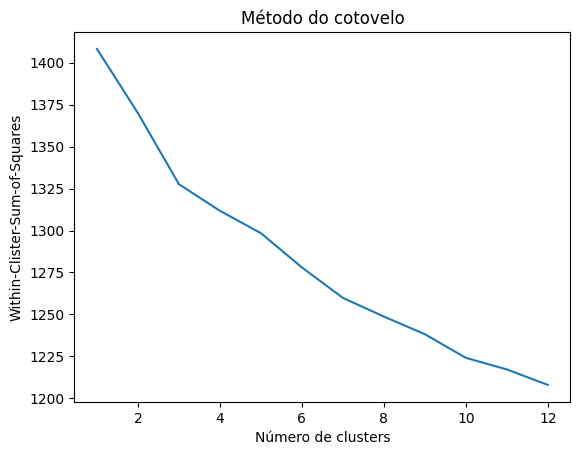

In [37]:
# metodo cotovelo 
wcss_jaccard = []
for i in range(1,13):
    kmeans_jaccard = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 30)
    kmeans_jaccard.fit(m_jaccard)
    wcss_jaccard.append(kmeans_jaccard.inertia_)

plt.plot(range(1,13), wcss_jaccard)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Within-Clister-Sum-of-Squares')
plt.show()

In [82]:
for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(m_jaccard)
    score = silhouette_score(m_jaccard, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.20919730006889356
Silhueta para 3 clusters : 0.0923149812194744
Silhueta para 4 clusters : 0.06054433142512063
Silhueta para 5 clusters : 0.06762160640680419
Silhueta para 6 clusters : 0.03201072465184843
Silhueta para 7 clusters : 0.028479743379736515
Silhueta para 8 clusters : 0.06019245111396757
Silhueta para 9 clusters : 0.03144356692283881
Silhueta para 10 clusters : 0.04100849347879214


### Dúvida:
- Não tende a zero tal como no caso da distância euclidiana -> jaccard é aplicável ainda sim?

### Tanimoto

#### Cotovelo para achar k

In [34]:
m_tanimoto = skl.metrics.pairwise_distances(mt_delicious, metric='rogerstanimoto')
m_tanimoto

/home/julianapirolla/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


array([[0.        , 0.04479786, 0.03261666, ..., 0.02948734, 0.02052606,
        0.04384793],
       [0.04479786, 0.        , 0.05506914, ..., 0.05835192, 0.05083207,
        0.07344937],
       [0.03261666, 0.05506914, 0.        , ..., 0.04752379, 0.03824837,
        0.06045643],
       ...,
       [0.02948734, 0.05835192, 0.04752379, ..., 0.        , 0.03561627,
        0.05858598],
       [0.02052606, 0.05083207, 0.03824837, ..., 0.03561627, 0.        ,
        0.04941561],
       [0.04384793, 0.07344937, 0.06045643, ..., 0.05858598, 0.04941561,
        0.        ]])

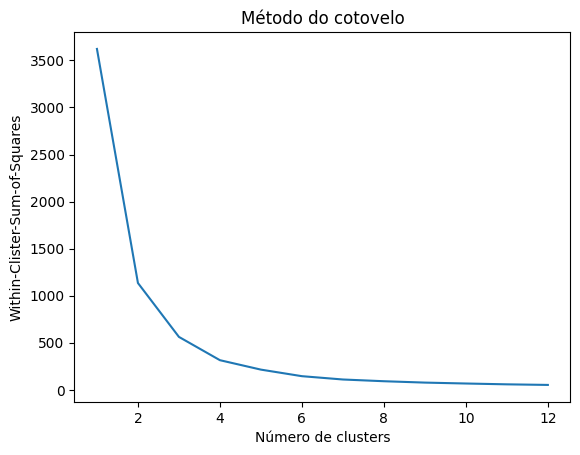

In [38]:
# metodo cotovelo 
wcss_tanimoto = []
for i in range(1,13):
    kmeans_tanimoto = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 30)
    kmeans_tanimoto.fit(m_tanimoto)
    wcss_tanimoto.append(kmeans_tanimoto.inertia_)

plt.plot(range(1,13), wcss_tanimoto)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Within-Clister-Sum-of-Squares')
plt.show()

In [83]:
for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(m_tanimoto)
    score = silhouette_score(m_tanimoto, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.8655090319392998
Silhueta para 3 clusters : 0.8008419376232557
Silhueta para 4 clusters : 0.7597108503479336
Silhueta para 5 clusters : 0.7273759787156405
Silhueta para 6 clusters : 0.679909468721425
Silhueta para 7 clusters : 0.6305816922597692
Silhueta para 8 clusters : 0.5928142762718628
Silhueta para 9 clusters : 0.57077473940085
Silhueta para 10 clusters : 0.5849118612254132


### Supondo k=3  (Tanimoto)

In [53]:
kmeans_tanimoto = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=30)
clusters = kmeans.fit_predict(m_tanimoto)
clusters  # consigo ver quem pertence a quais conjuntos

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,

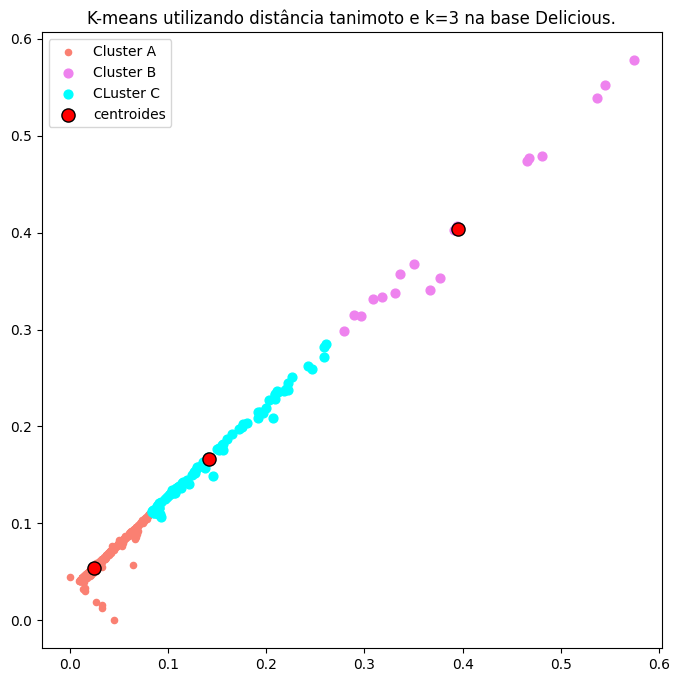

In [68]:
x_tanimoto= m_tanimoto

plt.figure(figsize=(8,8))
plt.scatter(
    x_tanimoto[clusters == 0,0], x_tanimoto[clusters == 0,1],
    s=20, c='salmon',
    #edgecolor='black',
    label='Cluster A',
)

plt.scatter(
    x_tanimoto[clusters == 1,0], x_tanimoto[clusters == 1,1], 
    s=40,c='violet',
    #edgecolor='black',
    label='Cluster B',
    
)
plt.scatter(
    x_tanimoto[clusters == 2,0], x_tanimoto[clusters == 2,1],
    s=40,c='aqua',
    #edgecolor='black',
    label='CLuster C',
)

# centroide
plt.scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
    c='red',
    edgecolor='black',
    label='centroides',
    s=90
)

plt.title('K-means utilizando distância tanimoto e k=3 na base Delicious.')
plt.legend()
plt.show()